## Mount Google drive and get the dataset

#### Link to used dataset: https://universe.roboflow.com/roboflow-jvuqo/blueberries-ixbl3

Note: Dataset should be a zip file in the '/content/drive/Datasets' directory.

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
drive_root_dir = '/content/drive/My Drive'

In [3]:
!ls  '{drive_root_dir}/Datasets/'

BlueBerries  BlueBerries.v959i.tensorflow.zip


In [4]:
!mkdir -p "/content/Datasets/"
!mkdir -p "/content/Datasets/BlueBerries/"

!unzip -n "{drive_root_dir}/Datasets/BlueBerries.v959i.tensorflow.zip" -d "{drive_root_dir}/Datasets/BlueBerries/"

Archive:  /content/drive/My Drive/Datasets/BlueBerries.v959i.tensorflow.zip


## Plot an image for preview

In [5]:
import cv2

image = cv2.imread(f'{drive_root_dir}/Datasets/BlueBerries/valid/76380A-1-_jpg.rf.aa0712516b698cdf6aa847c9eebee5ab.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

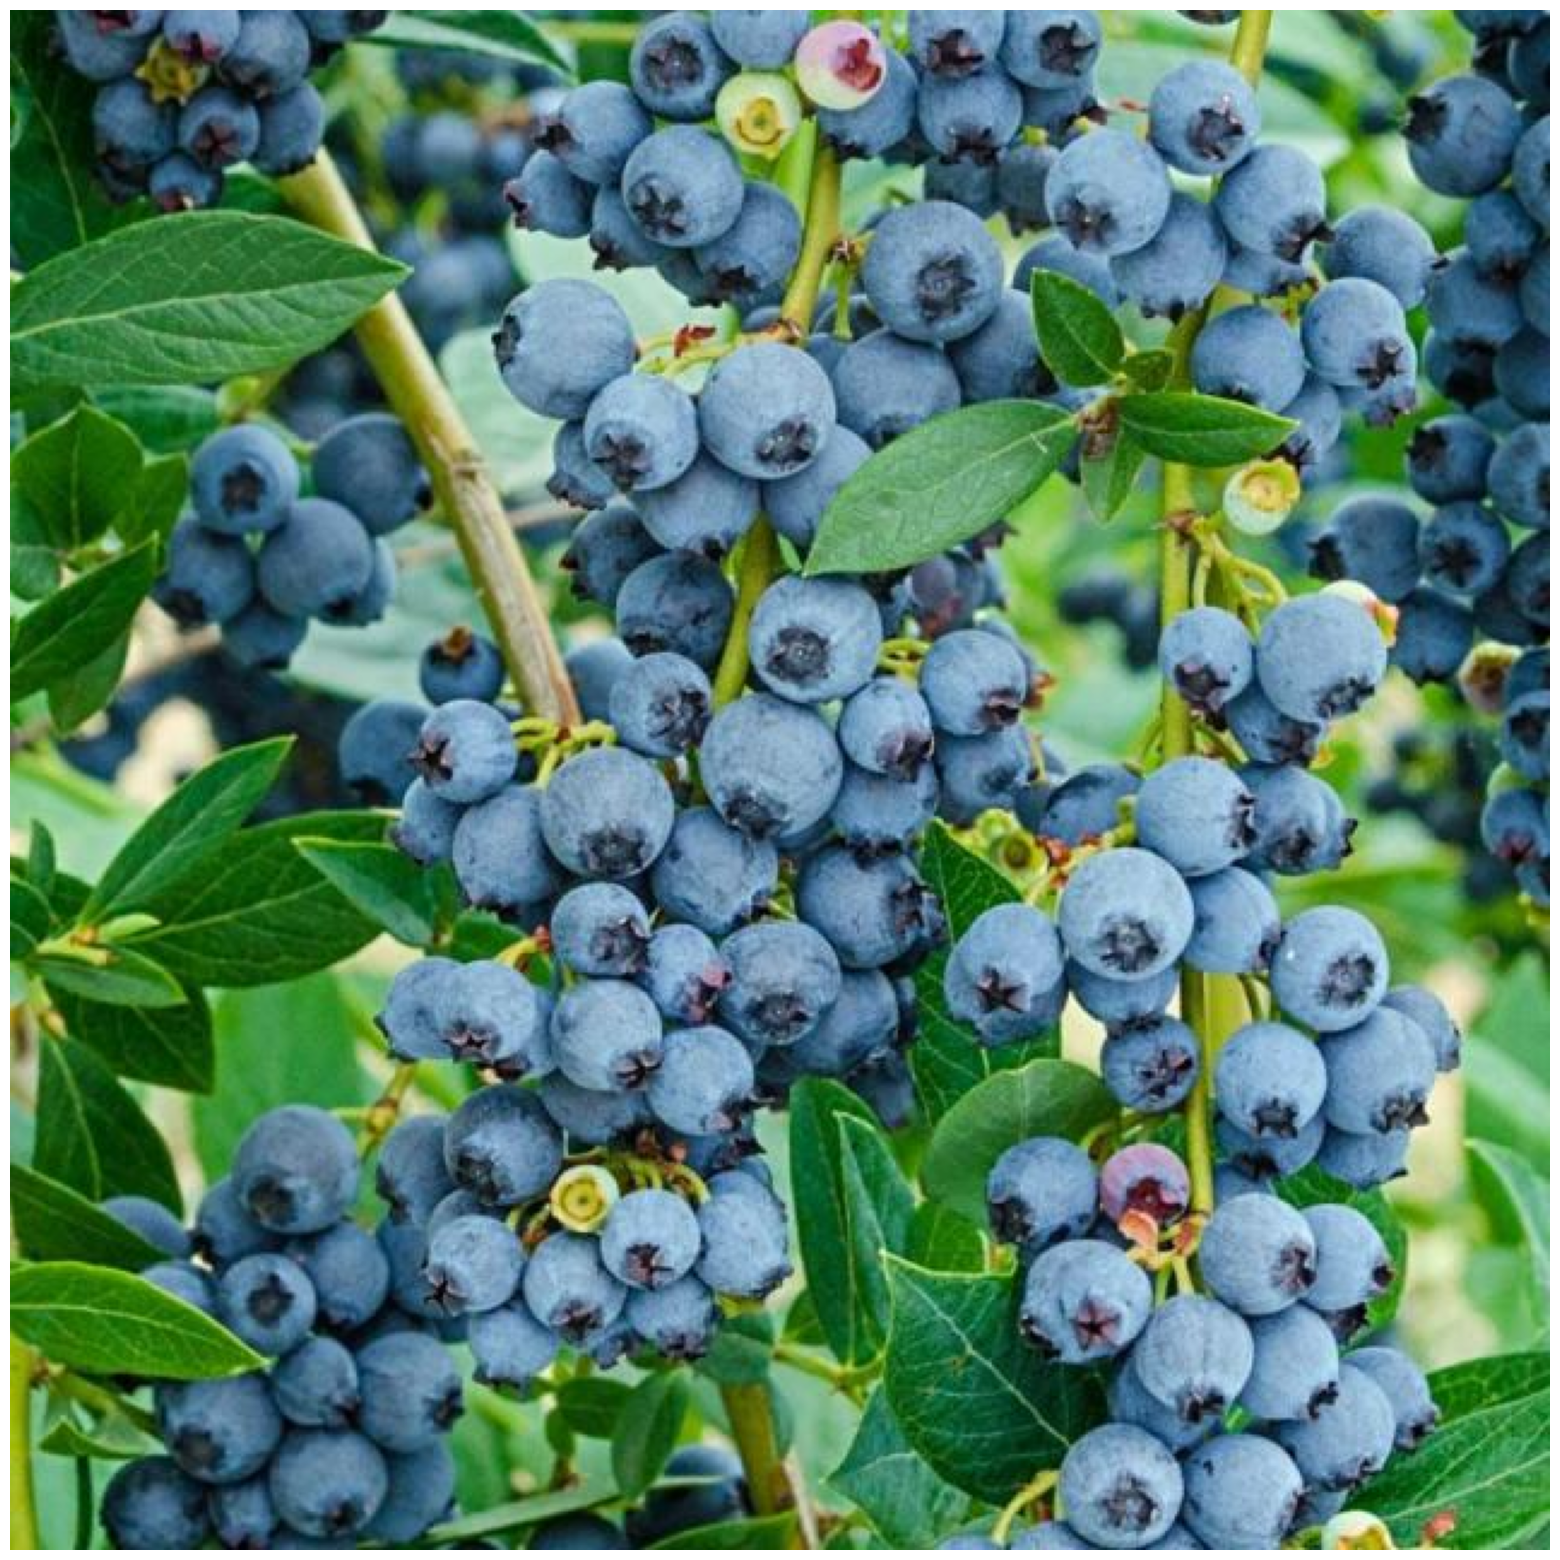

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

## SAM

### Importing some necessary libs and downloading the SAM model

In [7]:
# comment this line if not using colab
using_colab = True

In [8]:
if using_colab:
    import torch
    import torchvision
    print("PyTorch version:", torch.__version__)
    print("Torchvision version:", torchvision.__version__)
    print("CUDA is available:", torch.cuda.is_available())
    import sys
    !{sys.executable} -m pip install opencv-python matplotlib
    !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'


import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

!wget -nc https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

PyTorch version: 2.0.1+cu118
Torchvision version: 0.15.2+cu118
CUDA is available: True
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-knanxqfa
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-knanxqfa
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
File ‘sam_vit_h_4b8939.pth’ already there; not retrieving.



### Automatic Mask Generation Using SAM

In [9]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [10]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [11]:
masks = mask_generator.generate(image)

In [12]:
print(len(masks))
print(masks[0].keys())

375
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


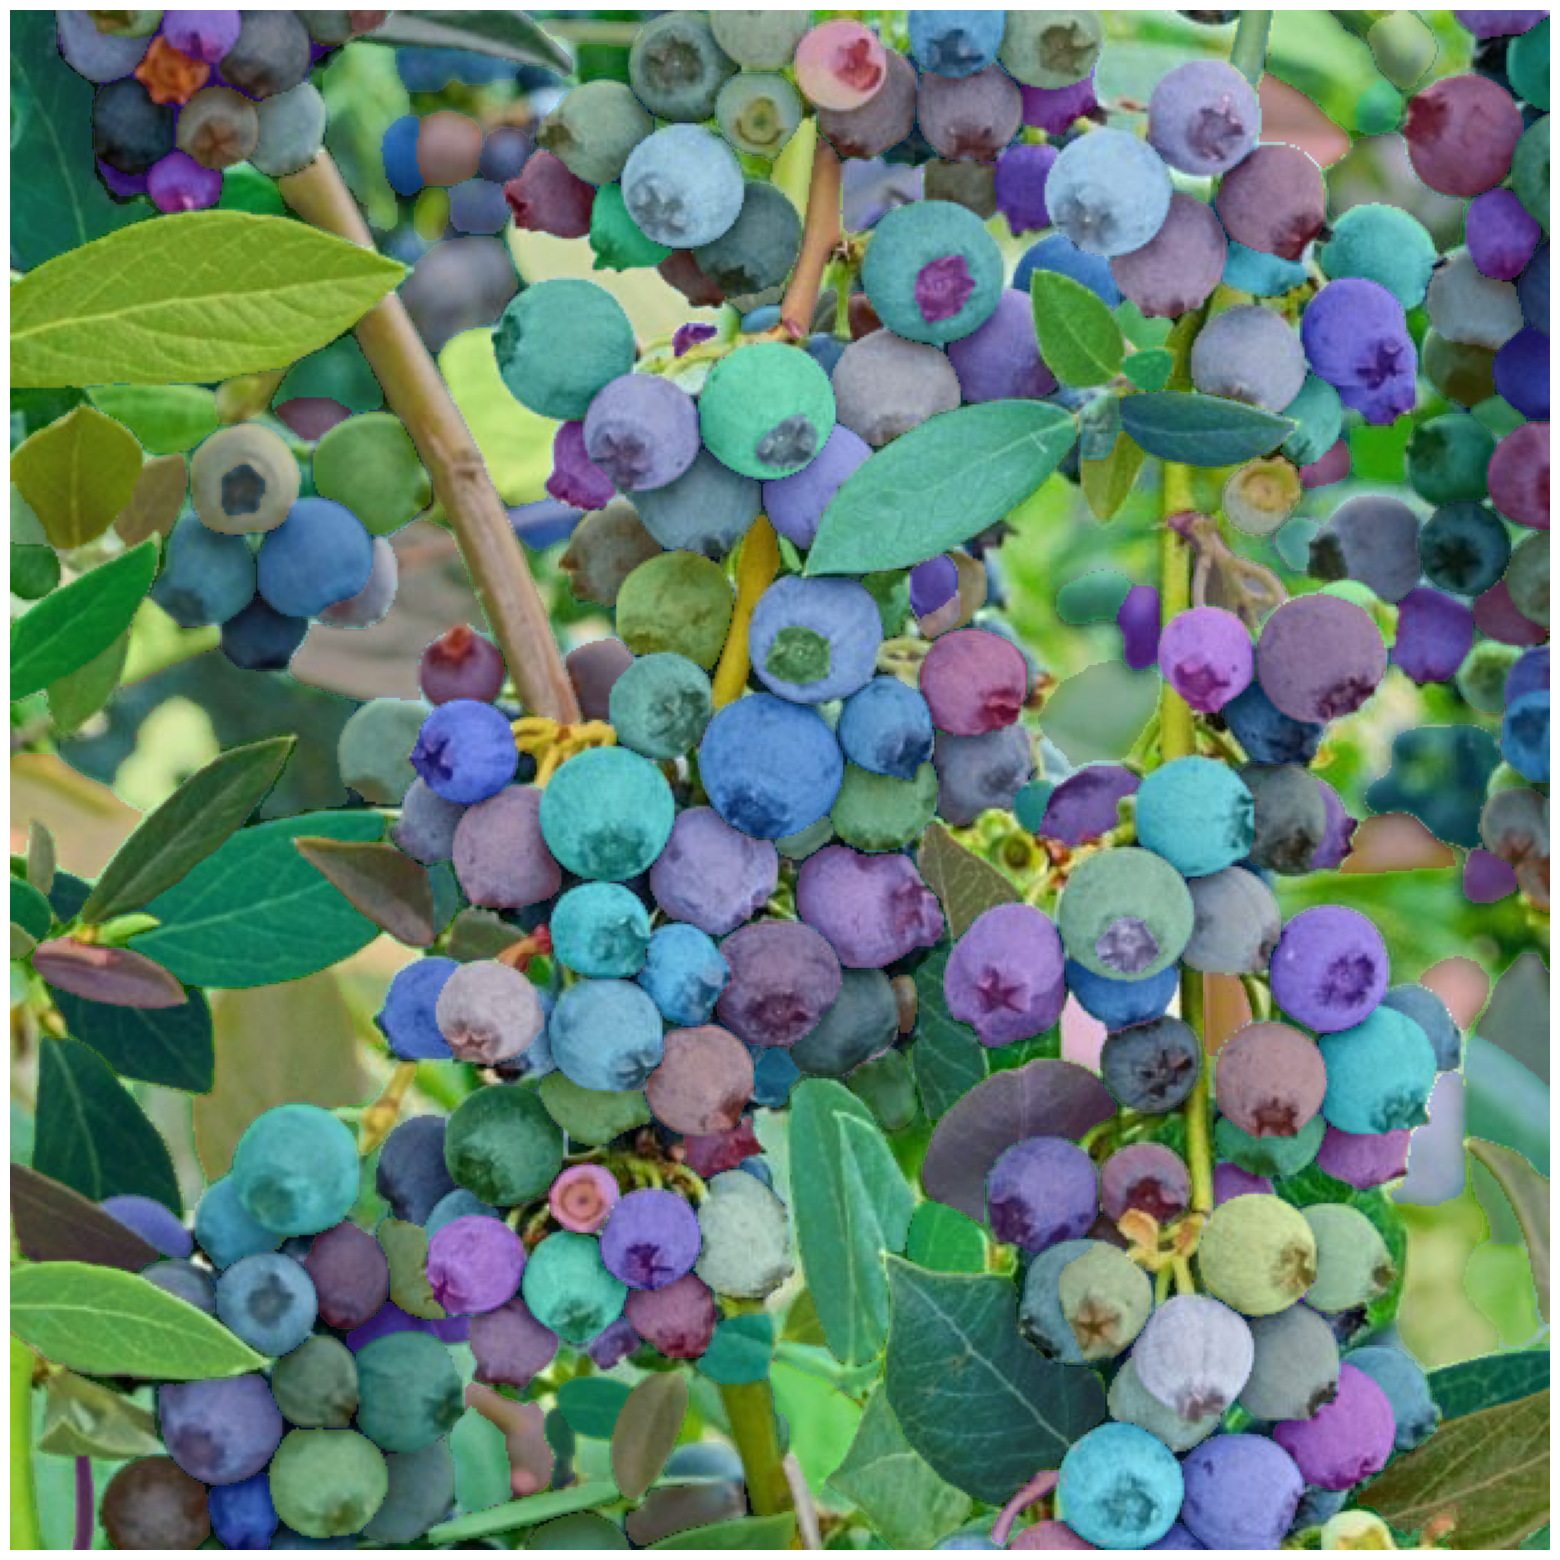

In [13]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()

As we can see, SAM is doing a fairly good job with segmenting the image. It's clear that it's capable of extracting and highlighting most of the blueberries accurately enough.

# To Be Done:

## Training the Classification Model

In this section, we're supposed to train a classification model on the labeled masks from the dataset, and validate it

### Feature Extraction

### Fitting

### Intersection Over Union

## Combining SAM with our classifier

In this section, we are supposed to combine the trained classifier with the masks that SAM has segmented and generated. In short, if the classifier tells that a specific mask is a Blueberry, then it's counted.